## 데이터 준비

In [7]:
import os
import json
import pandas as pd
from tqdm import tqdm

# 데이터 폴더 경로 설정
cb_folder = "../datas//낚시성 기사 탐지 데이터/Training/02.라벨링데이터/TL_Part1_Clickbait_Auto_SO"  # 클릭베이트 데이터
nm_folder = "../datas/낚시성 기사 탐지 데이터/Training/02.라벨링데이터/TL_Part1_NonClickbait_Auto_SO"  # 정상 데이터

# 데이터 로드 함수
def load_data_from_folder(folder, label):
    data = []
    file_list = [f for f in os.listdir(folder) if f.endswith('.json')]
    for file_name in tqdm(file_list, desc=f"Loading data from {folder}"):
        file_path = os.path.join(folder, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = json.load(file)
            title = content["sourceDataInfo"]["newsTitle"]
            text = content["sourceDataInfo"]["newsContent"]
            data.append({"title": title, "content": text, "label": label})
    return data

# 클릭베이트 및 정상 데이터 로드
cb_data = load_data_from_folder(cb_folder, label=0)
nm_data = load_data_from_folder(nm_folder, label=1)

# 데이터프레임 생성
df = pd.DataFrame(cb_data + nm_data)
print(f"Loaded {len(df)} records.")
print(df.head())


Loading data from ../datas//낚시성 기사 탐지 데이터/Training/02.라벨링데이터/TL_Part1_Clickbait_Auto_SO: 100%|██████████| 28956/28956 [00:05<00:00, 4961.15it/s]
Loading data from ../datas/낚시성 기사 탐지 데이터/Training/02.라벨링데이터/TL_Part1_NonClickbait_Auto_SO: 100%|██████████| 28135/28135 [00:05<00:00, 5486.39it/s]


Loaded 57091 records.
                                   title  \
0            임대주택 쫓겨나는 사람들, 밀린 월세는 누가 낼까   
1          새마을운동이 한류? EBS도 '친정권방송'에 합류하나   
2  도시가스협회 민들레카, 2년동안 4,500명에 130km 여행 선물   
3   美 화이자·모더나 심근염 이상반응 우려에…당국 \"조치 준비중\"   
4    코로나 장기화에…청년구직자 10명 중 6명 ‘사실상 구직 포기’   

                                             content  label  
0  #사례 1. 74년생 여성으로 자녀가 5명인 한 부모 가정 기초생활수급비에 의존해 ...      0  
1  EBS가 박근혜 정권 기조와 정책에 발맞추는 프로그램을 내보내거나 기획하고 있다.\...      0  
2  한국도시가스협회(회장 구자철)는 자사의 대표 사회 공헌 사업인 민들레카 서비스가2년...      0  
3  화이자나 모더나 신종 코로나바이러스 감염증(코로나19) 백신을 맞은 젊은층이 높은 ...      0  
4  신종 코로나바이러스 감염증(코로나19) 사태가 1년 넘게 지속되며 청년 구직자의 6...      0  


## 데이터 전처리

In [8]:
import re

def preprocess_text(text):
    # 백슬래시 제거
    text = text.replace("\\", "")
    # 중복된 공백 제거
    text = re.sub(r"\s+", " ", text).strip()
    return text

# 제목과 본문 전처리
df["title"] = df["title"].apply(preprocess_text)
df["content"] = df["content"].apply(preprocess_text)

# 제목과 본문 결합
df["combined_text"] = df["title"] + " " + df["content"]

# 결과 확인
df.head()


,title,content,label,combined_text
0,"임대주택 쫓겨나는 사람들, 밀린 월세는 누가 낼까",#사례 1. 74년생 여성으로 자녀가 5명인 한 부모 가정 기초생활수급비에 의존해 ...,0,"임대주택 쫓겨나는 사람들, 밀린 월세는 누가 낼까 #사례 1. 74년생 여성으로 자..."
1,새마을운동이 한류? EBS도 '친정권방송'에 합류하나,EBS가 박근혜 정권 기조와 정책에 발맞추는 프로그램을 내보내거나 기획하고 있다. ...,0,새마을운동이 한류? EBS도 '친정권방송'에 합류하나 EBS가 박근혜 정권 기조와 ...
2,"도시가스협회 민들레카, 2년동안 4,500명에 130km 여행 선물",한국도시가스협회(회장 구자철)는 자사의 대표 사회 공헌 사업인 민들레카 서비스가2년...,0,"도시가스협회 민들레카, 2년동안 4,500명에 130km 여행 선물 한국도시가스협회..."
3,"美 화이자·모더나 심근염 이상반응 우려에…당국 ""조치 준비중""",화이자나 모더나 신종 코로나바이러스 감염증(코로나19) 백신을 맞은 젊은층이 높은 ...,0,"美 화이자·모더나 심근염 이상반응 우려에…당국 ""조치 준비중"" 화이자나 모더나 신종..."
4,코로나 장기화에…청년구직자 10명 중 6명 ‘사실상 구직 포기’,신종 코로나바이러스 감염증(코로나19) 사태가 1년 넘게 지속되며 청년 구직자의 6...,0,코로나 장기화에…청년구직자 10명 중 6명 ‘사실상 구직 포기’ 신종 코로나바이러스...


## 파생변수 생성

In [9]:
# 파생변수 생성
df['title_length'] = df['title'].apply(lambda x: len(x.split()))  # 제목 단어 수
df['content_length'] = df['content'].apply(lambda x: len(x.split()))  # 본문 단어 수
df['title_content_ratio'] = df['title_length'] / (df['content_length'] + 1e-6)  # 제목-본문 비율
df['special_char_count'] = df['title'].apply(lambda x: sum([1 for char in x if char in "!?#"])) # 제목에 포함된 특수문자 갯수
df['number_in_title'] = df['title'].apply(lambda x: 1 if any(char.isdigit() for char in x) else 0) # 제목에 숫자가 있는지 여부

# TF-IDF 유사도 계산
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix_title = tfidf_vectorizer.fit_transform(df['title'])
tfidf_matrix_content = tfidf_vectorizer.transform(df['content'])

cosine_similarities = np.array([
    np.dot(tfidf_matrix_title[i].toarray(), tfidf_matrix_content[i].toarray().T)[0, 0]
    for i in range(len(df))
])
df['tfidf_similarity'] = cosine_similarities

# 데이터 분리
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

X = df[['content_length', 'title_content_ratio', 'tfidf_similarity']]
y = df['label']  # 이미 데이터프레임에 포함된 label 사용

# 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 랜덤포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, max_depth = 10, min_samples_split=2, min_samples_leaf= 4 ,random_state=42)
rf_model.fit(X_train, y_train)

# 예측 및 결과 출력
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.69      0.72      5766
           1       0.71      0.75      0.73      5653

    accuracy                           0.72     11419
   macro avg       0.72      0.72      0.72     11419
weighted avg       0.72      0.72      0.72     11419



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57091 entries, 0 to 57090
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                57091 non-null  object 
 1   content              57091 non-null  object 
 2   label                57091 non-null  int64  
 3   combined_text        57091 non-null  object 
 4   title_length         57091 non-null  int64  
 5   content_length       57091 non-null  int64  
 6   title_content_ratio  57091 non-null  float64
 7   special_char_count   57091 non-null  int64  
 8   number_in_title      57091 non-null  int64  
 9   tfidf_similarity     57091 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 4.4+ MB


<Axes: title={'center': 'Cosine Similarity'}, xlabel='label', ylabel='tfidf_similarity'>

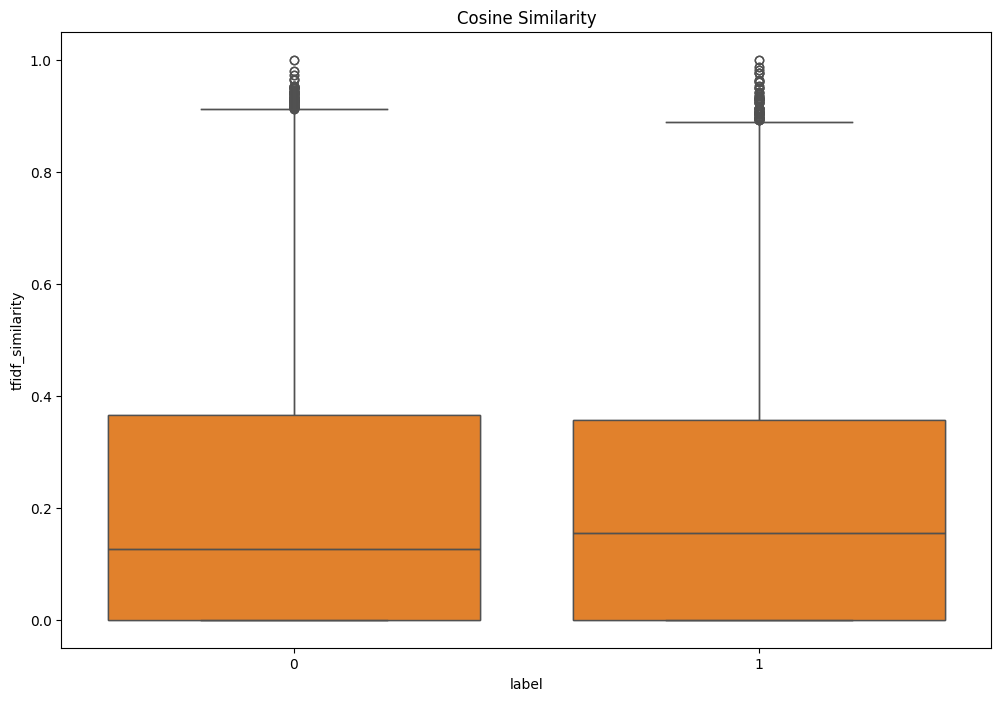

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.title('Cosine Similarity')
sns.boxplot(x='label', y='tfidf_similarity', data=df)
sns.boxplot(x='label', y='tfidf_similarity', data=df,)